In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("/Users/UGUR/data.csv")

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [7]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

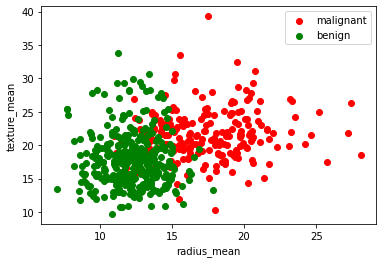

In [8]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [9]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 

In [10]:
y = data.diagnosis.values 

In [11]:
x_data= data.iloc[:,1:3].values 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_classification=DecisionTreeClassifier(random_state=1,criterion='entropy')
tree_classification.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [15]:
y_head=tree_classification.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_head)
accuracy

0.847953216374269

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_head)

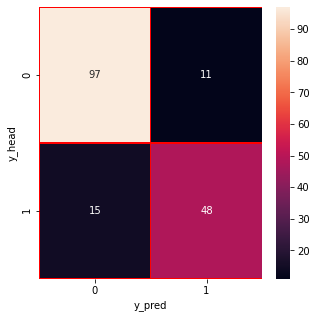

In [18]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_head")
plt.show()